## 라이브러리 임포트_20221114
- 실습에 필요한 라이브러리를 임포트한다.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기 (학습 데이터, 테스트 데이터)_20221114
- 데이터 분석 단계에서 생성한 농구 포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드합니다.

In [3]:
train = pd.read_csv("data/csv/basketball_train.csv")
test = pd.read_csv("data/csv/basketball_test.csv")

In [7]:
print(train.shape[0]) # 행의 값만 확인 # 훈련용 데이터 셋 갯수
print(train.shape[1]) # feature(특징, 열)의 값만 확인 # 훈련용 데이터 셋 갯수

print(test.shape[0]) # 테스트 데이터 셋 행 갯수
print(test.shape[1]) # 테스트 데이터 셋 열 갯수

80
5
20
5


## 최적의 k값 찾기_20221114

In [102]:
# import kNN library 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k값 찾기. 3부터 시작해서 max_k_range / 2 까지의 범위.
max_k_range = train.shape[0] // 2 # k값 최대값으로 반복수 체크
k_list = []

for i in range(3, max_k_range, 2): # 3, 5, ..11, 13... 39
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'TRB', 'BLK']] # 3개의 feature를 사용
# dataFrame으로 접근하는 pandas - loc, iloc 중요!! # dataFrame은 그냥 []로 쓰면 에러남. [[]]로 써야지 작동함.
y_train = train[['Pos']]

In [104]:
# 10-fold cross validation
for k in k_list: # 3, 5, ... 39(19개)
    knn = KNeighborsClassifier(n_neighbors=k) # 3nn모델이 됨.
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy') 
    # ravel() 옆으로 펼침(2차원을 1차원배열로) # cv = validation으로 1/10로 사용 # 정확도로 사용
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.9375,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.875]

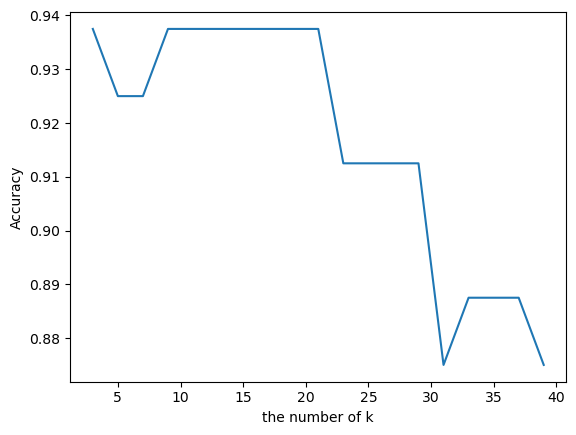

In [105]:
# 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [60]:
# 최적의 k 값
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("최적의 k 값 : " + str(k))

최적의 k 값 : 3


## 2개의 특징으로 예측하기('3P', 'BLK')_20221114

In [76]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [82]:
comparision = pd.DataFrame({'prediction':pred, 'target':y_test.values.ravel()})
comparision

,prediction,target
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG
5,SG,SG
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [95]:
from sklearn.metrics import accuracy_score

print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.8


## 3개의 특징으로 예측하기('3P', 'BLK','TRB')_20221114

In [96]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK','TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [97]:
comparision = pd.DataFrame({'prediction':pred, 'target':y_test.values.ravel()})
comparision

,prediction,target
0,SG,SG
1,C,SG
2,C,C
3,SG,SG
4,SG,SG
5,SG,SG
6,C,C
7,C,SG
8,SG,SG
9,C,C
